<a href="https://colab.research.google.com/github/hamidzargaran/Active-Learning/blob/master/Zargaran_LRvsAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Active Learning**

**Import required libraries.**

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit

**Data arrays**

In [171]:
# X contains 50 instances, each having 4 features
X = np.array([[5.1, 3.8, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.1, 3.3, 1.7, 0.5],
       [5.7, 3.8, 1.7, 0.3],
       [4.6, 3.1, 1.5, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [6.3, 2.9, 5.6, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 3.3, 5.7, 2.5],
       [6.1, 2.8, 4.7, 1.2],
       [5.6, 3. , 4.1, 1.3],
       [6.3, 2.7, 4.9, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [7.7, 2.8, 6.7, 2. ],
       [5.4, 3. , 4.5, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.8, 3. , 5.5, 2.1],
       [6.6, 2.9, 4.6, 1.3],
       [5.4, 3.7, 1.5, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 2.5, 4.9, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5. , 3.5, 1.6, 0.6],
       [5.5, 2.6, 4.4, 1.2],
       [6.5, 3. , 5.8, 2.2],
       [5.4, 3.4, 1.7, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.3, 2.3, 4.4, 1.3],
       [7.2, 3.2, 6. , 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.3, 3.7, 1.5, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [7.1, 3. , 5.9, 2.1],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.2, 2. ]])

# y contains the class labels for the instances in X 
y = np.array([0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 1, 2])

In [172]:
# plot
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

**Split data to train and test**.     

"train_test_split" method shuffles data. Then the Data frame is formed.

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
orginalTrainDataFrame = pd.DataFrame({'f1': X_train[:,0],'f2': X_train[:,1],'f3': X_train[:,2], 'f4': X_train[:,3], 'y': y_train})

**Part a) Logistic Regression**                      
Two nested loops is used in this part, inner loop is increasing the training set size by 5 random instances at each step and the outer loop is repeating the process for 30 times. "LogisiticRegression()" method is used to train the model, and then the accuracy array is calculated via "accuracy_score()" for predicted labels.
The average performance over 30 iterations is shown in the table which is in the output of this section. It can be seen that we have the best performance for training size of 20. The accuracy for this training size is "0.789".

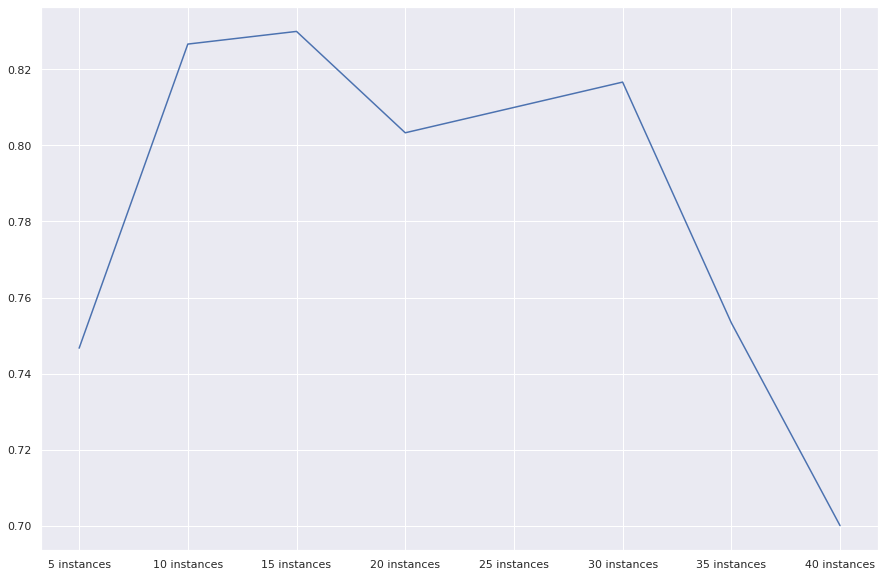

In [175]:
#initialization
accuracy = np.zeros([30,8])
iterations = ["5 instances", "10 instances", "15 instances", "20 instances", "25 instances", "30 instances", "35 instances", "40 instances"]

for i in range(30):
 trainDataFrame = orginalTrainDataFrame
 samplesTrain = pd.DataFrame()
 for counter in range(8):
  samples = trainDataFrame.sample(n=5)
  indexes = samples.index

  trainDataFrame = trainDataFrame.drop(indexes)
  
  samplesTrain = samplesTrain.append(samples)
  lr = LogisticRegression(C=8, random_state=0, solver='newton-cg', multi_class='multinomial')
  # Fit
  lr.fit(samplesTrain.iloc[:, :-1], samplesTrain.iloc[:, -1])
  # Predict
  y_pred = lr.predict(X_test)
  accuracy[i,counter] = accuracy_score(y_test, y_pred)
ave_accuracy = accuracy.mean(axis=0)

# plot table
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['iteration', 'accuracy'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
                 cells=dict(values=[iterations,
                       ave_accuracy],line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))])
fig.update_layout(width=500)
fig.show()

# plot line
plt.plot(iterations,ave_accuracy)
plt.show()

**Part b) Query by committee**                              
There are multiple libraries for QBC implementation. The "modAL" is one of the best, in my opinion. In this section, first of all, the library is installed and then the plot is imported and initialized.

In [176]:
pip install modAL

In this code section, the modAl library is imported at the begining.                                                                 The initial number of regressors is set to 5, and then the three sklearn functions is used to form the committee: "LogisticRegression()", "RandomForestClassifier()" and "SVC()". Then, these three learners is trained using "ActiveLearner()" function. The committee is formed with maximum standard deviation (max_std_sampling) and the three learners list.

The best parameter for these learners should be obtained from cross validation.


---

In [177]:
from modAL.models import ActiveLearner, CommitteeRegressor
from modAL.disagreement import max_std_sampling


# initializing the regressors
n_initial = 5

lr = LogisticRegression(C=8, random_state=0, solver='newton-cg', multi_class='multinomial')
svc = SVC(gamma=0.01, kernel='rbf', C=100)
rf = RandomForestClassifier()

train_idx = np.random.choice(range(X_train.shape[0]), size=n_initial, replace=False)
X = X_train[train_idx]
y = y_train[train_idx]

learner_list = list()

learner1 = ActiveLearner(estimator= lr, X_training=X, y_training=y)
learner_list.append(learner1)
 
learner2 = ActiveLearner(estimator= svc, X_training=X, y_training=y)
learner_list.append(learner2)

learner3 = ActiveLearner(estimator= rf, X_training=X, y_training=y)
learner_list.append(learner3)

# initializing the Committee
committee = CommitteeRegressor(
    learner_list=learner_list,
    query_strategy=max_std_sampling
)


Prediction for each learners.

In [178]:
for learner_idx, learner in enumerate(committee):
    c=learner.predict(X_test)

Prediction for committee.

In [179]:
prediction, std = committee.predict(X_test, return_std=True)

print("Max of variance:",std )


Max of variance: [0.         0.         0.         0.47140452 0.47140452 0.47140452
 0.         0.         0.         0.        ]


In [180]:
# active regression
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = committee.query(X_train)
    committee.teach(X_train[query_idx], y_train[query_idx])

In [181]:
# visualizing the regressors
import math

accuracy_QBC = []
# accuracy for each learner
for learner_idx, learner in enumerate(committee):
    accuracy_QBC.append(accuracy_score(y_test, learner.predict(X_test)))
# accuracy for committee
pred, std = committee.predict(X_test, return_std=True)

pred1 = []
for item in pred:
    pred1.append(math.floor(item))

accuracy_QBC.append(accuracy_score(y_test, pred1))


# plot table
import plotly.graph_objects as go
model = ["LR","SVC","RF","committee"]
fig = go.Figure(data=[go.Table(header=dict(values=['model', 'accuracy'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
                 cells=dict(values=[model,
                       accuracy_QBC],line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))])
fig.update_layout(width=500)
fig.show()